# Prediction of Wine Data Set 

Credit: https://github.com/sharmaroshan/Wine-Quality-Predictions/blob/master/WineQuality.ipynb

In [63]:
#!pip install --user scikit-learn

In [64]:
#!pip install tensorflow

In [65]:
##1-Upgrade tensorflow:
#!pip install --user --upgrade tensorflow-gpu

In [66]:
## 2-Upgrade Tensorboard
#!pip install --user --upgrade tensorboard

In [67]:
## 3-Downgrade Keras
#pip install keras==2.3.1

In [68]:
# 4-Downgrade tensorflow-gpu
#pip install --user --upgrade tensorflow-gpu==1.14.0

In [69]:
from sklearn import datasets
from sklearn import svm

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
wine_white = pd.read_csv('winequality-white.csv', delimiter = ';')

wine_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [72]:
wine_white.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [73]:
wine_white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [74]:

wine_white['quality'].value_counts()

6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: quality, dtype: int64

No handles with labels found to put in legend.


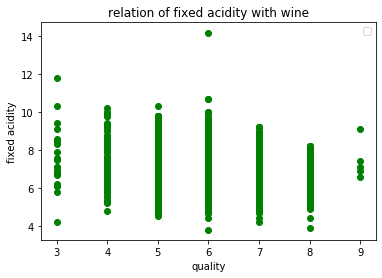

In [75]:
plt.scatter(wine_white['quality'], wine_white['fixed acidity'], color = 'green')
plt.title('relation of fixed acidity with wine')
plt.xlabel('quality')
plt.ylabel('fixed acidity')
plt.legend()
plt.show()

No handles with labels found to put in legend.


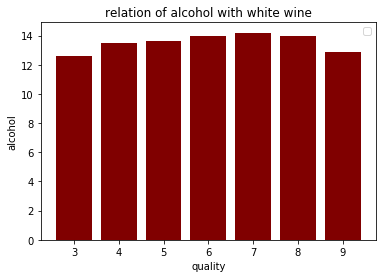

In [76]:
# checking the variation of fixed acidity in the different qualities of wine

plt.bar(wine_white['quality'], wine_white['alcohol'], color = 'maroon')
plt.title('relation of alcohol with white wine')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

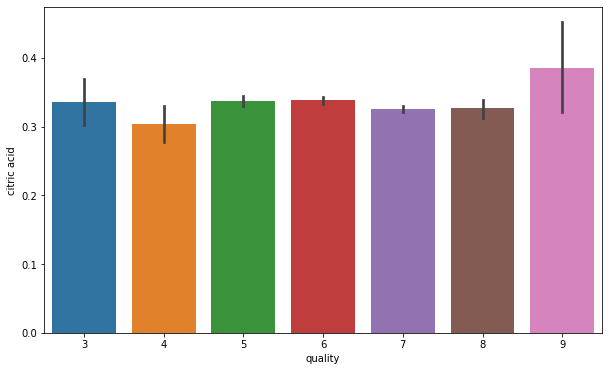

In [77]:
# Composition of citric acid go higher as we go higher in the quality of the wine

import seaborn as sns

fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = wine_white)

# Finding Correlation 


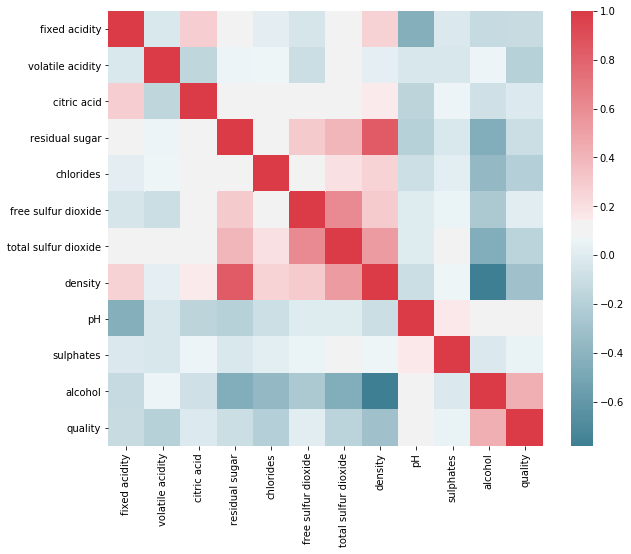

In [78]:

f, ax = plt.subplots(figsize=(10, 8))
corr = wine_white.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)

## Pearson Correlation

In [79]:
pearson_correlation = wine_white.corr(method ='pearson')
pearson_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.120881,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,0.067718,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.075729,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.450631,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.360189,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,-0.250104,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.448892,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.780138,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.121432,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,-0.017433,0.053678


In [80]:
# Find the top 3 correlation values for quality, exclude the top equal to 1, correlation with itself is always 1
# quality corr with quality = 1 , exclude this
quality_p = pearson_correlation['quality']
quality_p.nlargest(3)

quality    1.000000
alcohol    0.435575
pH         0.099427
Name: quality, dtype: float64

## Spearman Correlation 

In [81]:
spearman_correlation = wine_white.corr(method ='spearman')
spearman_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.042865,0.297878,0.106725,0.094691,-0.024542,0.112649,0.270031,-0.418341,-0.013238,-0.106827,-0.084485
volatile acidity,-0.042865,1.000000,-0.150410,0.108627,-0.004934,-0.081213,0.117614,0.010124,-0.045204,-0.016902,0.033967,-0.196562
citric acid,0.297878,-0.150410,1.000000,0.024621,0.032659,0.088314,0.093219,0.091425,-0.146193,0.079766,-0.029170,0.018333
residual sugar,0.106725,0.108627,0.024621,1.000000,0.227844,0.346107,0.431252,0.780365,-0.180028,-0.003844,-0.445257,-0.082070
chlorides,0.094691,-0.004934,0.032659,0.227844,1.000000,0.167046,0.375244,0.508302,-0.054006,0.093931,-0.570806,-0.314488
free sulfur dioxide,-0.024542,-0.081213,0.088314,0.346107,0.167046,1.000000,0.618616,0.327822,-0.006274,0.052252,-0.272569,0.023713
total sulfur dioxide,0.112649,0.117614,0.093219,0.431252,0.375244,0.618616,1.000000,0.563824,-0.011829,0.157825,-0.476619,-0.196680
density,0.270031,0.010124,0.091425,0.780365,0.508302,0.327822,0.563824,1.000000,-0.110061,0.095079,-0.821855,-0.348351
pH,-0.418341,-0.045204,-0.146193,-0.180028,-0.054006,-0.006274,-0.011829,-0.110061,1.000000,0.140243,0.148857,0.109362
sulphates,-0.013238,-0.016902,0.079766,-0.003844,0.093931,0.052252,0.157825,0.095079,0.140243,1.000000,-0.044868,0.033319


In [82]:
quality_p = pearson_correlation['quality']
quality_p.nlargest(3)

quality    1.000000
alcohol    0.435575
pH         0.099427
Name: quality, dtype: float64

In [83]:
quality_p.nlargest(3)

quality    1.000000
alcohol    0.435575
pH         0.099427
Name: quality, dtype: float64

## Kendall Correlation

In [84]:
kendall_correlation = wine_white.corr(method ='kendall')
kendall_correlation

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.029565,0.208569,0.074946,0.065361,-0.016940,0.077272,0.185510,-0.294796,-0.008724,-0.073241,-0.065474
volatile acidity,-0.029565,1.000000,-0.104012,0.072757,-0.003523,-0.054751,0.081319,0.006600,-0.030385,-0.011580,0.023495,-0.154787
citric acid,0.208569,-0.104012,1.000000,0.015329,0.022292,0.060809,0.062188,0.061542,-0.101307,0.054489,-0.019981,0.014557
residual sugar,0.074946,0.072757,0.015329,1.000000,0.155274,0.236748,0.293319,0.588989,-0.125553,-0.002545,-0.305601,-0.063087
chlorides,0.065361,-0.003523,0.022292,0.155274,1.000000,0.113851,0.257075,0.349119,-0.037891,0.062555,-0.404039,-0.244856
free sulfur dioxide,-0.016940,-0.054751,0.060809,0.236748,0.113851,1.000000,0.444696,0.217295,-0.005229,0.035621,-0.182539,0.017164
total sulfur dioxide,0.077272,0.081319,0.062188,0.293319,0.257075,0.444696,1.000000,0.388378,-0.008421,0.108697,-0.325826,-0.151230
density,0.185510,0.006600,0.061542,0.588989,0.349119,0.217295,0.388378,1.000000,-0.075630,0.064202,-0.635104,-0.266598
pH,-0.294796,-0.030385,-0.101307,-0.125553,-0.037891,-0.005229,-0.008421,-0.075630,1.000000,0.095823,0.102631,0.084441
sulphates,-0.008724,-0.011580,0.054489,-0.002545,0.062555,0.035621,0.108697,0.064202,0.095823,1.000000,-0.026410,0.026403


In [85]:
# Find the top 3 positive correlation values for quality, exclude the top equal to 1, correlation with itself is always 1
# quality corr with quality = 1 , exclude this

quality_k = kendall_correlation['quality']
quality_k.nlargest(3)

quality    1.000000
alcohol    0.346672
pH         0.084441
Name: quality, dtype: float64

In [86]:
# What about finding top 3 most negative correlation?
quality_k = kendall_correlation['quality']
quality_k.nsmallest(3)


density            -0.266598
chlorides          -0.244856
volatile acidity   -0.154787
Name: quality, dtype: float64

We can see pearson and spearman are roughly the same, but kendall is very much different.That’s because Kendall is a test of strength of dependece (i.e. one could be written as a linear function of the other), whereas Pearson and Spearman are nearly equivalent in the way they correlate normally distributed data. All of these correlations are correct in their result, it’s just that Pearson/Spearman are looking at the data in one way, and Kendall in another.

A better situation for spearman or kendall (but not for pearson) when the data is ORDINAL, in that it is ranked. So let’s transform the test 1 scores into rank scores of how well each classmate did relative to one another.

credit: https://ademos.people.uic.edu/Chapter22.html#:~:text=we%20can%20see%20pearson%20and,they%20correlate%20normally%20distributed%20data.

In [87]:
#sns.pairplot(wine_white)

## Unique Values for Quality 

In [88]:
#What are the unique values for the quality ranking
unique_values = wine_white.quality.unique()
unique_values.sort()


In [89]:
unique_values 

array([3, 4, 5, 6, 7, 8, 9], dtype=int64)

## Preparing Data: Assigning Value Quality to Binary 0-1 for Training 

In [90]:
# Quality Values are given from 1-10, and we want to classify things from good and bad, 

In [91]:
good = wine_white.quality > 5
bad = wine_white.quality <= 5
column_name = 'quality'
wine_white.loc[good, column_name] = 1
wine_white.loc[bad, column_name] = 0

In [96]:
good_count = wine_white['quality'].sum()
good_count 

3258

In [98]:
bad_count = len(wine_white['quality']) - good_count
bad_count

1640

[Text(0.5, 1.0, 'Count of Bad Wines(blue) vs Good Wines(orange)')]

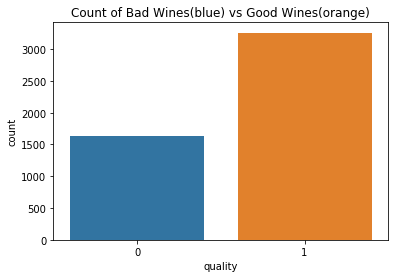

In [99]:
sns.countplot(wine_white['quality']).set(title='Count of Bad Wines(blue) vs Good Wines(orange)')



##  Creating training/testing sets

In [100]:
# dividing the dataset into dependent and independent variables

x = wine_white.iloc[:,:11]
y = wine_white.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(4898, 11)
(4898,)


In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3673, 11)
(3673,)
(1225, 11)
(1225,)


In [102]:
# standard scaling 
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Modeling 

## Logitistic Regression 

Logistic Regression outputs predictions about test data points on a binary scale, zero or one. If the value of something is 0.5 or above, it is classified as belonging to class 1, while below 0.5 if is classified as belonging to 0.

Each of the features also has a label of only 0 or 1. Logistic regression is a linear classifier and therefore used when there is some sort of linear relationship between the data.

In [103]:

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.model_selection import GridSearchCV, cross_val_score



# creating the model
model = LogisticRegression()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 0.7511570922951266
Testing accuracy : 0.7526530612244898
              precision    recall  f1-score   support

           0       0.71      0.49      0.58       427
           1       0.77      0.89      0.82       798

    accuracy                           0.75      1225
   macro avg       0.74      0.69      0.70      1225
weighted avg       0.75      0.75      0.74      1225

[[211 216]
 [ 87 711]]


## Stochastic Gradient Descent Classifier

In [104]:
from sklearn.linear_model import SGDClassifier

# creating the model
model = SGDClassifier(penalty=None)

# feeding the training model into the model
model.fit(x_train, y_train)

# predicting the values for the test set
y_pred = model.predict(x_test)

# classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.34      0.46       427
           1       0.72      0.93      0.81       798

    accuracy                           0.72      1225
   macro avg       0.72      0.63      0.63      1225
weighted avg       0.72      0.72      0.69      1225



## Support Vector Machine

Support Vector Machines work by drawing a line between the different clusters of data points to group them into classes. Points on one side of the line will be one class and points on the other side belong to another class.

The classifier will try to maximize the distance between the line it draws and the points on either side of it, to increase its confidence in which points belong to which class. When the testing points are plotted, the side of the line they fall on is the class they are put in.

In [105]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.8110536346310917
Testing accuracy : 0.7779591836734694


In [106]:
# finding the best parameters for the SVC model

param = {
    'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(model, param_grid = param, scoring = 'accuracy', cv = 10)

In [107]:
grid_svc.fit(x_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_svc.best_params_

In [ ]:
# creating a new SVC model with these best parameters

model2 = SVC(C = 1.4, gamma = 0.1, kernel = 'rbf')
model2.fit(x_train, y_train)
y_pred = model2.predict(x_test)

print(classification_report(y_test, y_pred))

## Decision Forest 

A Decision Tree Classifier functions by breaking down a dataset into smaller and smaller subsets based on different criteria. Different sorting criteria will be used to divide the dataset, with the number of examples getting smaller with every division.

Once the network has divided the data down to one example, the example will be put into a class that corresponds to a key. When multiple random forest classifiers are linked together they are called Random Forest Classifiers.

In [108]:
from sklearn.tree import DecisionTreeClassifier

# creating model
model = DecisionTreeClassifier()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.7412244897959184


In [109]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      0.63      0.63       427
           1       0.80      0.80      0.80       798

    accuracy                           0.74      1225
   macro avg       0.72      0.72      0.72      1225
weighted avg       0.74      0.74      0.74      1225

[[271 156]
 [161 637]]


In [110]:
#Now lets try to do some evaluation for decision tree model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

0.7802941002250917

## Random Forest 


In [111]:

from sklearn.ensemble import RandomForestClassifier

# creating the model
model = RandomForestClassifier(n_estimators = 200)

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 0.8318367346938775


In [112]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.69      0.74       427
           1       0.84      0.91      0.88       798

    accuracy                           0.83      1225
   macro avg       0.82      0.80      0.81      1225
weighted avg       0.83      0.83      0.83      1225

[[294 133]
 [ 73 725]]


In [113]:

#Now lets try to do some evaluation for random forest model using cross validation.

model_eval = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10)
model_eval.mean()

KeyboardInterrupt: 

## Multilayer Perceptron 


In [ ]:
from sklearn.neural_network import MLPClassifier

# creating the model
model = MLPClassifier(hidden_layer_sizes = (100, 100), max_iter = 150)

# feeding the training data to the model
model.fit(x_train, y_train)

# calculating the accuracies
print("training accuracy :", model.score(x_train, y_train))
print("testing accuracy :", model.score(x_test, y_test))

## Artifial Neural Networks 

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# creating the model
model = Sequential()

# first hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu', input_dim = 11))

# second hidden layer
model.add(Dense(output_dim = 8, init = 'uniform', activation = 'relu'))

# output layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))

# Compiling the NN
# binary_crossentropy loss function used when a binary output is expected
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy']) 

model.fit(x_train, y_train, batch_size = 10, nb_epoch = 100)

## Next Steps

## Other Models to Consider Trying 

### Naive Bayes
A Naive Bayes Classifier determines the probability that an example belongs to some class, calculating the probability that an event will occur given that some input event has occurred.

When it does this calculation it is assumed that all the predictors of a class have the same effect on the outcome, that the predictors are independent.

### KNN K nearest neighbors

K-Nearest Neighbors operates by checking the distance from some test example to the known values of some training example. The group of data points/class that would give the smallest distance between the training points and the testing point is the class that is selected.